In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats

In [4]:
# imporing cleaned laptop data
path=r"C:\Users\HP\Desktop\CODE\DATA ANALYSIS with PYTHON\cleaned_data_for2.2(old laptop data).csv"
df=pd.read_csv(path)
df.head()

,Manufacturer,Category,GPU,OS,CPU_core,Screen_Size_cm,CPU_frequency,RAM_GB,Storage_GB_SSD,Weight_kg,Price,Price_binned,screen_Full_HD,screen_IPS_Panel
0,Acer,4,2,1,5,14.0,0.551724,8,256,3.52800,978,low,0,1
1,Dell,3,1,1,3,15.6,0.689655,4,256,4.85100,634,low,1,0
2,Dell,3,1,1,7,15.6,0.931034,8,256,4.85100,946,low,1,0
3,Dell,4,2,1,5,13.3,0.551724,8,128,2.69010,1244,low,0,1
4,HP,4,2,1,7,15.6,0.620690,8,256,4.21155,837,low,1,0


### Basic EDA:

In [5]:
df.describe()

,Category,GPU,OS,CPU_core,Screen_Size_cm,CPU_frequency,RAM_GB,Storage_GB_SSD,Weight_kg,Price,screen_Full_HD,screen_IPS_Panel
count,238.000000,238.000000,238.000000,238.000000,238.000000,238.000000,238.000000,238.000000,238.000000,238.000000,238.000000,238.000000
mean,3.205882,2.151261,1.058824,5.630252,14.688655,0.813822,7.882353,245.781513,4.106221,1462.344538,0.676471,0.323529
std,0.776533,0.638282,0.235790,1.241787,1.166045,0.141860,2.482603,34.765316,1.078442,574.607699,0.468809,0.468809
min,1.000000,1.000000,1.000000,3.000000,12.000000,0.413793,4.000000,128.000000,1.786050,527.000000,0.000000,0.000000
25%,3.000000,2.000000,1.000000,5.000000,14.000000,0.689655,8.000000,256.000000,3.246863,1066.500000,0.000000,0.000000
50%,3.000000,2.000000,1.000000,5.000000,15.000000,0.862069,8.000000,256.000000,4.106221,1333.000000,1.000000,0.000000
75%,4.000000,3.000000,1.000000,7.000000,15.600000,0.931034,8.000000,256.000000,4.851000,1777.000000,1.000000,1.000000
max,5.000000,3.000000,2.000000,7.000000,17.300000,1.000000,16.000000,256.000000,7.938000,3810.000000,1.000000,1.000000


In [6]:
df.describe(include=['object'])

,Manufacturer,Price_binned
count,238,238
unique,11,3
top,Dell,low
freq,71,160


In [7]:
num_col=df.describe()
cat_col=df.describe(include=['object'])

#we did this to easily access names of continius and categorical columns seperately and quickly

In [8]:
#cont numerical cols:
num_col.columns

Index(['Category', 'GPU', 'OS', 'CPU_core', 'Screen_Size_cm', 'CPU_frequency',
       'RAM_GB', 'Storage_GB_SSD', 'Weight_kg', 'Price', 'screen_Full_HD',
       'screen_IPS_Panel'],
      dtype='object')

In [9]:
#categorical col names:
cat_col.columns

Index(['Manufacturer', 'Price_binned'], dtype='object')

### Checking correlation coefficient of all the Continous Numerical columns:(with target variable=PRICE)

In [10]:
list_of_col=[df['Category'], df['GPU'], df['OS'], df['CPU_core'], df['Screen_Size_cm'], df['CPU_frequency'],
       df['RAM_GB'], df['Storage_GB_SSD'], df['Weight_kg'], df['Price'], df['screen_Full_HD'],
       df['screen_IPS_Panel']]
corr_list=[]
p_list=[]
def cal_corr(x,y):
    corr,p=stats.pearsonr(x,y)
    print(f"{x.name}:")#note how we used x. name in place of df['col'].name
    print(f"correlation coeff: {corr}")
    print(f"pearson-value: {p}\n")

    corr_list.append(corr)
    p_list.append(p)

for i in list_of_col:
    cal_corr(i,df['Price'])



Category:
correlation coeff: 0.2862427558126413
pearson-value: 7.225696235806605e-06

GPU:
correlation coeff: 0.28829819888814273
pearson-value: 6.166949698364437e-06

OS:
correlation coeff: -0.22172980114827384
pearson-value: 0.000569664255924674

CPU_core:
correlation coeff: 0.4593977773355115
pearson-value: 7.912950127009359e-14

Screen_Size_cm:
correlation coeff: -0.11064420817118273
pearson-value: 0.0885339784683062

CPU_frequency:
correlation coeff: 0.36666555892588615
pearson-value: 5.502463350713219e-09

RAM_GB:
correlation coeff: 0.5492972971857841
pearson-value: 3.681560628842973e-20

Storage_GB_SSD:
correlation coeff: 0.24342075521810302
pearson-value: 0.00014898923191723976

Weight_kg:
correlation coeff: -0.05031225837751551
pearson-value: 0.43976938534338894

Price:
correlation coeff: 1.0
pearson-value: 0.0

screen_Full_HD:
correlation coeff: -0.021074572471421624
pearson-value: 0.7463568309776343

screen_IPS_Panel:
correlation coeff: 0.021074572471421638
pearson-value: 0.

In [11]:
print(f'The maximum correlation value is: {max(corr_list)}')#its showing 1 for price column itself
print(f'The maximum cp value is: {max(p_list)}')

The maximum correlation value is: 1.0
The maximum cp value is: 0.7463568309776343


In [12]:
#cpu core,cpu frequency,ram_gb are most correlated ones:


### Regplots for most correlated ones:

<Axes: xlabel='CPU_core', ylabel='Price'>

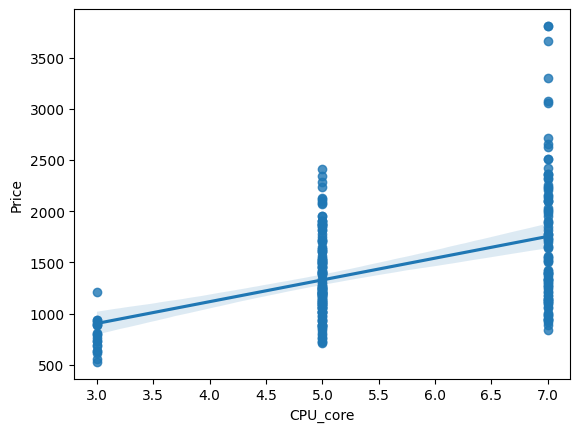

In [13]:
sns.regplot(x='CPU_core',y='Price',data=df)
#not highly correlated-drop

<Axes: xlabel='CPU_frequency', ylabel='Price'>

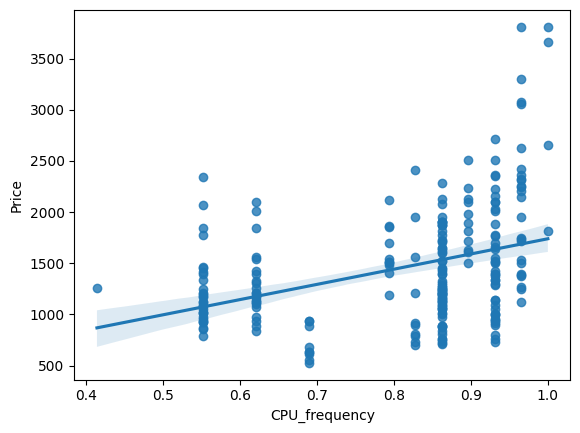

In [14]:
sns.regplot(x='CPU_frequency',y='Price',data=df)
#somewhat correlated

<Axes: xlabel='RAM_GB', ylabel='Price'>

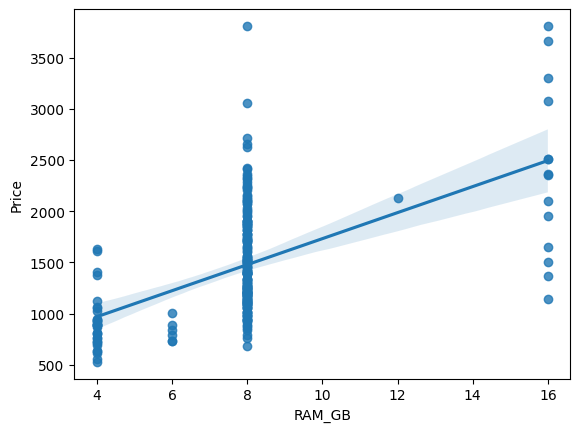

In [15]:
sns.regplot(x='RAM_GB',y='Price',data=df)
#not much correlated -drop

<Axes: xlabel='Screen_Size_cm', ylabel='Price'>

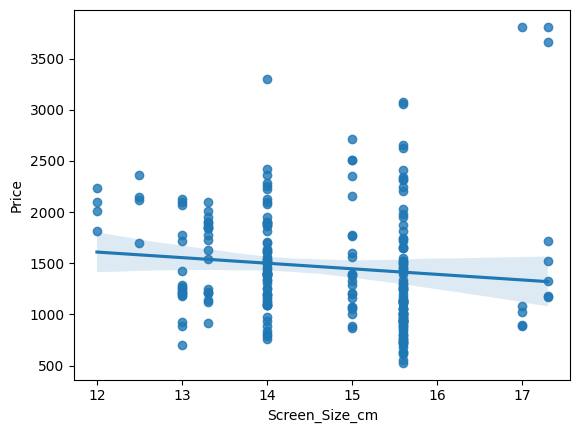

In [16]:
sns.regplot(x='Screen_Size_cm',y='Price',data=df)
#somewhat correlated,although negatively


<Axes: xlabel='Weight_kg', ylabel='Price'>

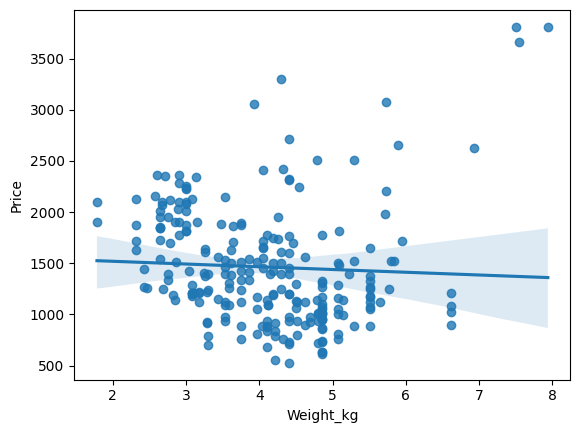

In [17]:
sns.regplot(x='Weight_kg',y='Price',data=df)
#quite correlated


In [18]:
num_col.columns

Index(['Category', 'GPU', 'OS', 'CPU_core', 'Screen_Size_cm', 'CPU_frequency',
       'RAM_GB', 'Storage_GB_SSD', 'Weight_kg', 'Price', 'screen_Full_HD',
       'screen_IPS_Panel'],
      dtype='object')

## Categorical variables -"Category", "GPU", "OS", "CPU_core", "RAM_GB", "Storage_GB_SSD"

### making box plots:

<Axes: xlabel='Category', ylabel='Price'>

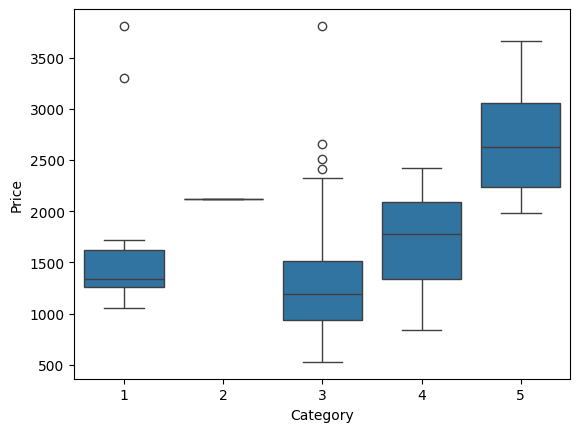

In [19]:
"Category", "GPU", "OS", "CPU_core", "RAM_GB", "Storage_GB_SSD"
#NOTE-ITS NOT NECESSARY THAT ONLY OBJECT-TYPE COLUMNS ARE CATEGORICAL,EVEN NUMERICAL ONES CAN BE (BUT NOT CONTINOUS NUMERICAL ONES)

sns.boxplot(x='Category',y='Price',data=df)
#cannot be used for prediction

<Axes: xlabel='GPU', ylabel='Price'>

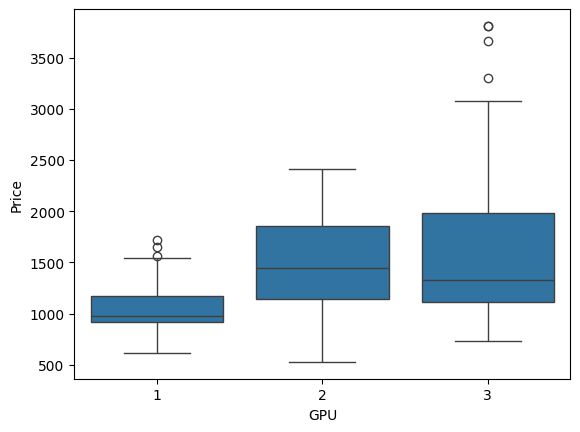

In [20]:
sns.boxplot(x='GPU',y='Price',data=df)
#cannot be used for prediction

<Axes: xlabel='OS', ylabel='Price'>

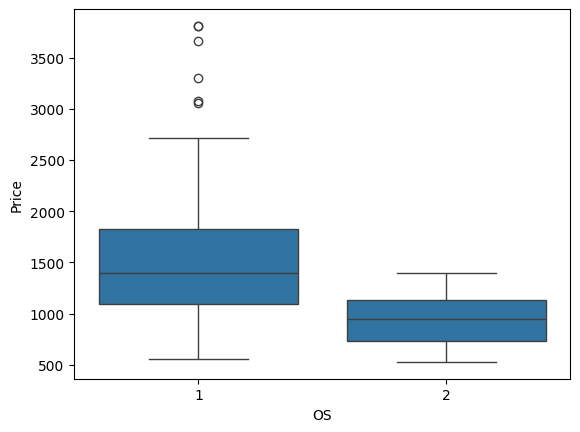

In [21]:
sns.boxplot(x='OS',y='Price',data=df)
#can be used for prediction

<Axes: xlabel='RAM_GB', ylabel='Price'>

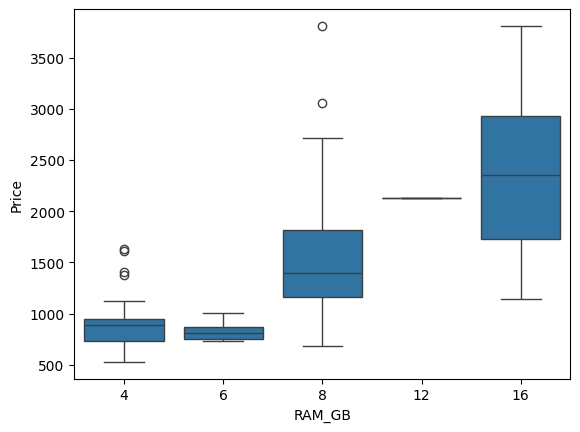

In [22]:
sns.boxplot(x='RAM_GB',y='Price',data=df)
#can be used for prediction

<Axes: xlabel='Storage_GB_SSD', ylabel='Price'>

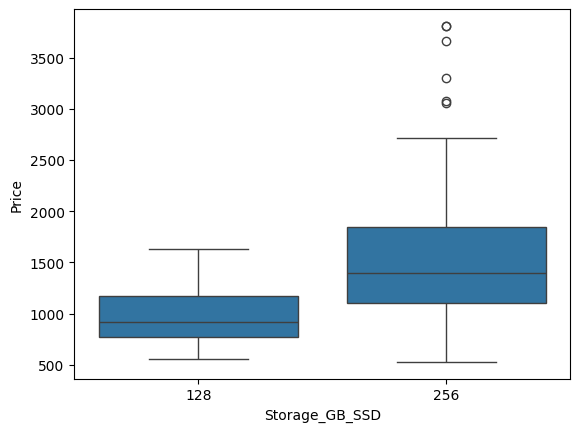

In [23]:
sns.boxplot(x='Storage_GB_SSD',y='Price',data=df)
#can be used for prediction


### Group the parameters "GPU", "CPU_core" and "Price" to make a pivot table and visualize this connection using the pcolor plot

In [29]:
df_group=df[['GPU','CPU_core','Price']]
df_group.groupby(['Price'],as_index=False).mean()

,Price,GPU,CPU_core
0,527,2.0,3.0
1,558,2.0,3.0
2,616,1.0,3.0
3,634,1.5,3.0
4,685,2.0,3.0
...,...,...,...
188,3059,3.0,7.0
189,3073,3.0,7.0
190,3301,3.0,7.0
191,3665,3.0,7.0


In [28]:
grouped=df_group.groupby(['Price'],as_index=False).mean()

### creating a pivot table:

In [ ]:
pivot_table=grouped.pivot(index='GPU',columns='CPU_core')
pivot_table